**M1 Physique et Applications**


**Traitement du Signal 2021 - 2022**

# TP1: Analyse statistique de signaux

Les notions vues dans ce TP sont la caractérisation statistique d’un signal, et leur prise en compte pour l’estimation.

**Noms et prénoms:** CHENEY Camille

**Date:** 16/09/2021

**Groupe:** 2

Quelques conseils pour l'utilisation de Jupyter Notebook:

- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ou *Run* ci-dessus ou tapez **Shift+Enter**

- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre* ou *Kernel/Interrupt*

- en cas de très gros plantage *Noyau/Redémarrer* ou *Kernel/Restart*

- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
``` 
par vos réponses, et remplissez les champs ci-dessous:

# Mesures du radiotélescope Rameau

Des mesures réelles d’une radiosource ont été réalisées
à l’aide du radiotélescope Rameau situé sur le toit du
bâtiment 333 de l’université. On souhaite estimer le flux
supposé constant.
Les mesures sont enregistrées dans le fichier
**signal1.txt**.

- La première colonne donne l’instant de la mesure en *millisecondes*

- La deuxième la tension, proportionnelle au flux, mesurée en *volt*.

## Importation et représentation des mesures

Après avoir importé les mesures dans un tableau *data* 2D (déja fait pour vous ci-dessous), à l’aide de la fonction **plot** de **pyplot** par exemple, représenter, en minutes, l’allure temporelle des mesures et commenter.

La première colonne des données peut etre extraite avec: **data[:,0]**

**Remarque**: Pour tous les graphiques, ne pas oublier
titre, axes ainsi que les unités.

[[0.0000e+00 1.6500e+00]
 [2.0000e+02 1.6400e+00]
 [4.0000e+02 1.6300e+00]
 ...
 [3.9994e+06 2.0400e+00]
 [3.9996e+06 2.0300e+00]
 [3.9998e+06 2.0400e+00]]
N = 20000


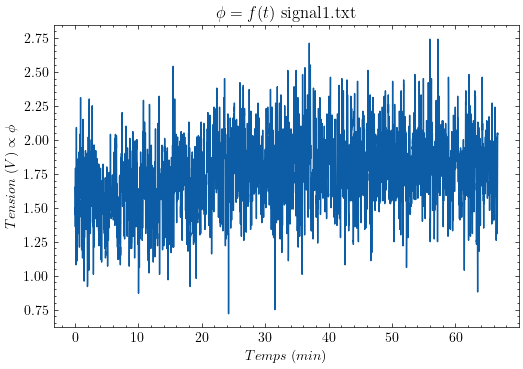

In [1]:
# Import des librairies
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# Options graphiques
plt.style.use('science') # Style du plot
figure(figsize=(6, 4), dpi=100) # Taille du plot

# Lecture des données
data=np.loadtxt(r"C:\Users\chene\OneDrive\Documents\M1 Physique & Applications\Traitement du signal\TPs-20210915\Fichiers_donnees\signal1.txt")
print(data) # Affiche les données : matrice à deux colonnes contenant t et V
print("N =",len(data[:,0])) # Affiche la longueur de la matrice des données (N valeurs)

# Mise en forme des données
plt.plot(data[:,0]/60e3, data[:,1]) # Trace le graphe V=f(flux) / data[:,0]=Temps, abscisse / data[:,1]=Tension, ordonnée
plt.xlabel("$Temps~(min)$" ) # Titre de l'axe x
plt.ylabel("$Tension~(V) \propto \phi$") # Titre de l'axe y
plt.title("$\phi=f(t)$ signal1.txt") # Titre du plot
plt.show() # Affichage du plot

**Q1:** Commentez vos résultats.

<font color='blue'>

On observe sur le graphique ci-dessus l'acquisition du flux de photon en fonction du temps. 

Ce flux est assez irrégulié au cours du temps mais semble être constant autour des valeurs comprises en 1,50 $V$ et 2 $V$. Il s'ajoute par dessus cette "constante" des fluctuations.

## Étude statistique
### Histogramme des mesures

**Q2:** Expliquer en quelques phrases, et avec les notions
d’intervalle et de comptage, comment est réalisé un
histogramme.

<font color='blue'>

Un histogramme est réalisé en représentant en ordonnée le nombre de fois qu'un événement est réalisé (qui représente l'effectif). Ces effectifs sont regroupés dans des intervalles de comptage dont la largeur peut varier. Ainsi, la largeur de ces intervalles de comptage influent sur la forme de l'histogramme. 

**Q3:** Calculer et représenter l’histogramme des mesures
avec la fonction **hist** de **pyplot**

Tester avec un nombre d’intervalles plus ou moins
faible ou élevé.

<IPython.core.display.Latex object>

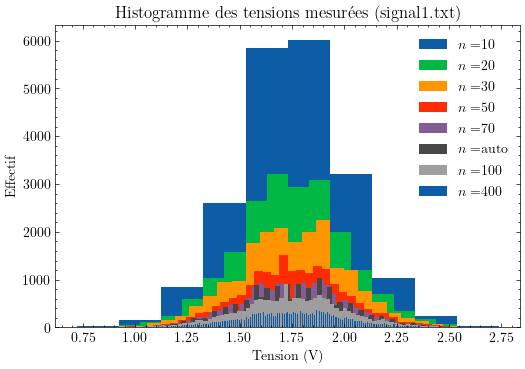

In [2]:
# Import des librairies
from IPython.display import display, Latex

# Options graphiques
plt.style.use('science') # Style du plot
figure(figsize=(6, 4), dpi=100) # Taille du plot

# Boucle for qui permet de tracer plusieurs histogrammes pour différents nombre d'intervalle (n)
n=[10,20,30,50,70,"auto",100, 400]
for i in n:
    plt.hist(data[:,1], i, label="$n= $"+format(i)) # Dessine l'histogramme
plt.xlabel("Tension (V)") # Titre de l'axe x
plt.ylabel("Effectif") # Titre de l'axe y
plt.title("Histogramme des tensions mesurées (signal1.txt)") # Titre de l'histogramme
plt.legend() # Affiche la légende sur l'histogramme

# Obtenir la valeur de n=auto
effectif,intervalle = np.histogram(data[:,1], bins='auto') 
display(Latex('$n_{auto}=~$'f'${len(effectif)}$')) # Affiche le nombre d'intervalle pour n=auto

plt.show() # Affiche la compilation des histogrammes

**Q4:** Pourquoi parle-t-on de compromis
entre résolution et bruit statistique pour choisir le
nombre d’intervalles ?

<font color='blue'>

On voit alors que les tensions sont réparties selon une loi qui semble Gaussienne.

Quand $n$ augmente, on s'aperçoit que passé un certain seuil on pert totalement la forme Gaussienne, il faut donc trouver un compromis.


### Densité de probabilité et histogramme normalisé
On suppose que nos mesures sont les réalisations d’une variable aléatoire $X$. On note également $x_i$ et $x_{i+1}$ les bornes des intervalles utilisés pour construire l’histogramme.

**Q5:** Donner la relation pour passer du comptage $n_i$ dans
l’intervalle $i$ de l’histogramme à la probabilité $P(x_i \leq X \leq x_{i+1})$.


<font color='blue'>

$P(x_i \leq X \leq x_{i+1})=\sum\limits_{k=0}^{N} \frac{n_i}{n_k}$
    
Avec N le nombre total d'intervalle. La somme des $n_k$ de $0$ à $N$ correspond au nombre total de mesures.


**Q6:** Rappeler la relation entre $P(x_i \leq X \leq x_{i+1})$ et la
fonction de répartition $F(x)$.

<font color='blue'>

$P(x_i \leq X \leq x_{i+1})=P(X \leq x_{i+1})-P(X<x_i)$

$=P(X \leq x_{i+1})-P(X \leq x_{i-1})$

$=F(x_{i+1})-F(x_{i-1})$


**Q7:** Rappeler le lien entre $F(x)$ et la densité de probabilité
$p(x)$. 

En supposant la densité constante de valeur $p_i$
dans chaque intervalle $[x_i; x_{i+1}]$, donner la relation
entre la probabilité $P(x_i \leq X \leq x_{i+1})$ et la valeur $p_i$.

Finalement, donner la relation entre $p_i$ et $n_i$.

<font color='blue'>

$F(x)=P(X \leq x)=\int_{-\infty}^{x}p_i(x) dx$
    
$P(x_i \leq X \leq x_{i+1})=\int_{x_i}^{x_{i+1}}p_i(x) dx$
    
Or $p_i=cst$ sur chaque intervalle $[x_i; x_{i+1}]$
    
Donc $P(x_i \leq X \leq x_{i+1})=p_i\int_{x_i}^{x_{i+1}}dx=p_i(x_{i+1}-x_i)$
 
Or on a vu à la **Q5** que : $P(x_i \leq X \leq x_{i+1})=\sum\limits_{k=0}^{N} \frac{n_i}{n_k}$

    
Donc : $p_i(x_{i+1}-x_i)=\sum\limits_{k=0}^{N} \frac{n_i}{n_k}$

    
$\boxed{p_i=\sum_{k=0}^{N} \frac{n_i}{n_k\times(x_{i+1}-x_i)}}$


**Q8:** Tracer alors une *estimation* $\widehat{p}$ de la densité de probabilité $p$
de $X$ à l’aide de la fonction **plot**. Vérifier que la densité $\widehat{p}$ est normalisée à 1.

**Note:** poour récupérer les données d'un histogramme, vous pouvez utiliser la fonction **histogram** de la librairie **numpy**.

**Q9:** Vérifier que vous avez bien une estimation de la densité densité $\widehat{p}$ en supporsant plusieurs estimation obtenue avec plusieurs histogrammes différents (10 et 50 intervalles par exemple). Les courbes doivent se supperposer puisqu’elle estime la même chose. Supperposer les histogrammes ne donne pas le même résultat.

**Note** Superposer des courbes se fait avec des appels successifs de la fonction **plot**

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

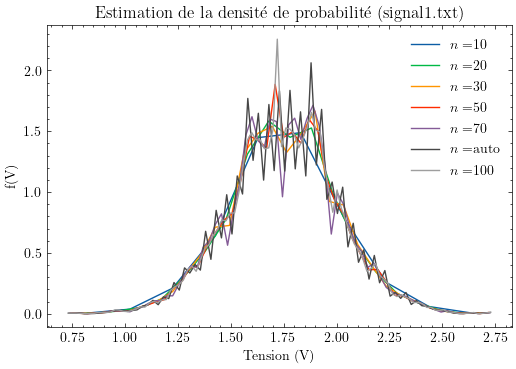

In [3]:
# Options graphiques
plt.style.use('science') # Style du plot
figure(figsize=(6, 4), dpi=100) # Taille du plot

# Boucle qui trace la densité de probabilité pour différentes valeurs de n
n=[10,20,30,50,70,"auto",100]
for nbInter in n:

    hist,bins = np.histogram(data[:,1], bins=nbInter) 

    # Calcule la probabilité p(X)
    f=[]
    for i in range(len(hist)):
        i=(hist[i]/((bins[i+1]-bins[i])*sum(hist)))
        f.append(i)

    # Calcule la valeur de la tension moyenne dans l'intervalle x_(i) , x_(i+1)
    V=[]
    for i in range(len(hist)):
        i=(bins[i+1]+bins[i])/2
        V.append(i)

    plt.plot(V, f, label="$n= $"+format(nbInter)) # Trace le plot
    
    # Calcul de l'intégrale de la densité de probabilité par la méthode des trapèzes
    Int=[]
    for i in range(len(V)-1):
        i=((V[i+1]-V[i])*((f[i+1]+f[i])/2))
        Int.append(i)
    display(Latex(f'$n={nbInter}:$''$\int_{x_0}^{x_{n}}f(x)dx=~$'f'${format(sum(Int),".4f")}$')) # Affiche la valeur de l'intégrale
    
plt.xlabel("Tension (V)")
plt.ylabel("f(V)")
plt.title("Estimation de la densité de probabilité (signal1.txt)")
plt.legend()
plt.show()

**Q10:** Commenter l'allure de cette densité de
  probabilité et la déduction que l'on peut faire sur le processus
  stochastique sous-jacent.

<font color='blue'>

Cette densité de probabilité a l'allure d'une Gaussienne, ce qui laisse penser à une loi normale. 

Cela laisse alors supposer que la source observée par le télescope émet la plupart de ses photons autour d'une énergie moyenne, mais émet quand même des photons avec plus ou moins d'énergie de façon symétrique par rapport à l'énergie moyenne.

### Moyenne et médiane
**Q11:** Calculer la moyenne expérimentale des mesures à l’aide de la fonction **average** de **numpy**. Préciser son unité. Rappeler l’expression du calcul de la moyenne expérimentale. De quelle grandeur théorique la moyenne expérimentale est-elle l’estimateur ?

In [4]:
moy=np.average(data[:,1])

display(Latex('$\overline{x}=$'f'$~{format(moy,".4f")}~V$')) # Affiche la valeur de la moyenne expérimentale


<IPython.core.display.Latex object>

<font color='blue'>

La moyenne expérimentale se calcule selon l'expression suivante : $\boxed{\bar{x}=\frac{1}{N}\sum\limits _{i=1}^{N}x_i}$
    
Son unité est en volt dans notre cas.


**Q12:** Calculer la médiane expérimentale des mesures à l’aide de la fonction **median** de **numpy**. Préciser son unité.

In [5]:
med=np.median(data[:,1])

display(Latex('$med=$'f'$~{format(med,".4f")}~V$')) # Affiche la valeur de la moyenne expérimentale


<IPython.core.display.Latex object>

<font color='blue'>

L'unité de la médiane est aussi le volt dans notre cas.

**Q13:** Comparer les valeurs de la médiane et de la moyenne expérimentales. Que peut-on en déduire ?

<font color='blue'>

Les valeurs de la moyenne et de la médiane sont extrêmement proches dans notre cas, ce qui signifie qu'on étudie un phénomène statiqtique qui suit pratiquement une loi normale.

**Q14:** Comparer les valeurs obtenues avec l’estimation de la densité de probabilité.

<font color='blue'>

Pour comparer les moyennes, on a utilisé la formule ci-dessous dans notre algorithme

$\overline x=\frac{\sum\limits_{i=0}^N p_i~n_i}{{\sum\limits_{i=0}^N p_i}}$

In [24]:
n=[10,20,30,50,70,"auto",100]
for nbInter in n:

    hist,bins = np.histogram(data[:,1], bins=nbInter) 

    # Calcule la probabilité p(X)
    f=[]
    for i in range(len(hist)):
        i=(hist[i]/((bins[i+1]-bins[i])*sum(hist)))
        f.append(i)

    # Calcule la valeur de la tension moyenne dans l'intervalle x_(i) , x_(i+1)
    V=[]
    for i in range(len(hist)):
        i=(bins[i+1]+bins[i])/2
        V.append(i)
    
    E=[]
    for i in range(len(hist)):
        i=f[i]*V[i]
        E.append(i)
    display(Latex(f'$n={nbInter}:$''$\overline x=$'f'$~{sum(E)/sum(f)}~V$')) # Affiche la valeur de la moyenne expérimentale


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<font color='blue'>

On remarque qu'on obtient des valeurs de moyenne proches de celle calculée experimentalement.
    
On obtient avec l'estimation de la densité de probabilité $\overline x\approx 1,75$ et $\overline x=1,75$ avec la moyenne expérimentale. 

### Variance, écart-type et barres d'erreurs
**Q15:** Calculer la variance et l’écart-type expérimentaux des mesures à l’aide des fonctions **var** et **std** de **numpy**. Préciser les unités et rappeler les expressions.

In [26]:
# Calcul de la variance
var=np.var(data[:,1])
display(Latex('$var=$'f'$~{format(var,".4f")}~V^2$')) # Affiche la valeur de la variance expérimentale

# Calcul de l'écart type
std=np.std(data[:,1])
display(Latex('$\overline\sigma=$'f'$~{format(std,".4f")}~V$')) # Affiche la valeur de l'écart-type expérimentale

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<font color='blue'>

La variance est en $V^2$ et l'écart-type est en $V$.
    
Car ${\overline\sigma}^2=var$

**Q16:** Donner, visuellement, l’intervalle de tension centré sur la moyenne et qui semble contenir la quasi-totalité des mesures.

<font color='blue'>

Cet intervalle semble être $[1,5~;~2]~V$

**Q17:** Mettre l’intervalle obtenu en regard de l’écart-type expérimental. L’écart-type expérimental est-il une représentation correcte de la dispersion des mesures ?

<font color='blue'>

Avec l'écart type, on obtient $[1,7506-0,2568~;~1,7506+0,2568]=[1,4938~;~2,0074]$ soit $[1,5~;~2]~V$ comme trouvé à la question précédente. 
    
L'écart-type est donc un bon estimateur de la dispersion des mesures.

### Asymétrie et aplatissement
Le moment centré d’ordre *m* d’une VA de densité p est:

\begin{equation}
  \mu_m = \int_D (x - \mathbb{E}[X])^m \mathrm{p}(x) \mathrm{d}x.
\end{equation}

L'asymétrie $\gamma_1$ et l'aplatissement $\gamma_2$ sont définis comme:

\begin{equation}
  \gamma_1 = \frac{\mu_3}{\mu_2^{3/2}} \quad \mathrm{et} \quad \gamma_2 = \frac{\mu_4}{\mu_2^2} - 3.
\end{equation}

La loi normale est telle que $\gamma_1 = \gamma_1 = 0$. 

Une loi telle que $\gamma_1$ > 0, respectivement $\gamma_1$ < 0, a une queue longue à
droite, respectivement à gauche. 

Une loi telle que $\gamma_2$ > 0,
respectivement $\gamma_2$ < 0, est plus pointue, respectivement
plus plate, qu’une gaussienne.

Des estimateurs, à partir de N échantillons, sont
\begin{equation}
  \widehat{\gamma_1} = \frac{1}{N} \sum_{n=1}^N \left( \frac{x_n - \bar{x}}{\bar{\sigma}} \right)^3
\end{equation}
et
\begin{equation}
  \widehat{\gamma_2} = \frac{1}{N} \sum_{n=1}^N \left( \frac{x_n - \bar{x}}{\bar{\sigma}} \right)^4 - 3
\end{equation}

ou $\bar{x}$ et $\bar{\sigma}$ sont respectivement la moyenne et
l'écart-type expérimentaux.


**Q18:** Calculer l’asymétrie et l’aplatissement expérimentaux.

**Note:** Il n'est pas nécessaire d'utiliser des boucles pour faire de sommes. Si vous avez une *array* **x** de **numpy**, la somme des éléments peut se faire simplement par la commande **x.sum**. De plus la fonction **pow(x,y)** permet de calculer $x^y$.

In [8]:
YI=[]
for i in range(len(data[:,1])):
    i=(1/len(data[:,1]))*pow((((data[:,1][i])-np.average(data[:,1]))/np.std(data[:,1])),3)
    YI.append(i)
    
display(Latex('$\widehat{\gamma_1}=$'f'$~{format(sum(YI),".3f")}$')) # Affiche la valeur de l'asymétrie

YII=[]
for i in range(len(data[:,1])):
    i=(1/len(data[:,1]))*pow((((data[:,1][i])-np.average(data[:,1]))/np.std(data[:,1])),4)
    YII.append(i)
    
display(Latex('$\widehat{\gamma_2}=$'f'$~{format(sum(YII)-3,".3f")}$')) # Affiche la valeur de l'aplatissement

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<font color='blue'>
L'algorithme ci-dessous calcule skewness et kurtosis avec les fonctions skew et kurt de scipy.stats :

In [9]:
from scipy.stats import skew, kurtosis
skew=skew(data[:,1])
print("skew =", format(skew,".3f"))
kurt=kurtosis(data[:,1])
print("kurtosis =", format(kurt,".3f"))

skew = -0.027
kurtosis = 0.172


<font color='blue'>
On remarque alors que les coefficients de symétrie et d'aplatissement sont égaux en utilisant les deux méthodes, ce qui indique que nous n'avons pas d'erreurs dans le calcul réalisé avec l'algorithme.

Pour une loi normale, l'incertitude sur l'estimation de $\gamma_1$ est
approximativement de $\sqrt{6/N}$.  Une distribution est considérée
asymétrique si $\widehat{\gamma_1}$ diffère de 0 de plusieurs fois
cette incertitude. De meme pour $\widehat{\gamma_2}$ pour lequel l'incertitude
est approximativement $\sqrt{24/N}$.

**Q19:** Vérifier si les valeurs obtenues sont significatives et interpréter. Comparer avec l’estimation de la densité de probabilité.

In [10]:
# Incertitude absolue sur le coefficient de symétrie
display(Latex('$U_{\gamma_1}=~$'f'$~{format(np.sqrt(6/20e3),".3f")}$'))

# Incertitude absolue sur le coefficient d'aplatissement
display(Latex('$U_{\gamma_2}=~$'f'$~{format(np.sqrt(24/20e3),".3f")}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<font color='blue'>
On a donc $\widehat{\gamma_1}\approx-1,6~U_{\gamma_1}$ et $\widehat{\gamma_2}\approx-4,9~U_{\gamma_2}$
    
On peut donc dire que notre densité de probabilité est symétrique mais ne suit pas parfaitement une loi normale car l'incertitude sur le kurtosis est trop grande par rapport à lui même.


## Estimation
**Q20:** Proposer, en justifiant, une estimation pour le flux de la radiosource (en tension).

<font color='blue'>

Le flux est supposé constant, donc prendre la moyenne expérimentale de nos mesures semble être une bonne estimation du flux de la radiosource.
    
Et donc pour le signal1.txt, le flux serait égal à : $\varphi=\overline x=1,75 V$ 
    
Et on aurait une équivalence $V=\alpha~\text{photons.s}^{-1}$


**Q20:** Proposer, en justifiant, une barre d’erreur pour cette estimation.

<font color='blue'>
Dans notre cas, on réalise N mesures individuelles, de façon indépendante. La dispersion des mesures sur la moyenne est caractérisée par l'estimateur de l'écart-type sur la moyenne (on fait référence à une incertitude de type A). 
    
L'incertitude sur le flux vaut alors : $u(\varphi)_{\overline x}=\frac{\sigma}{\sqrt{N}}$ 
    
De plus, l'écart type a la même dimension que la moyenne et donc que le flux.
    
On peut alors écrire : $\varphi=1,75 \pm \frac{\sigma}{\sqrt{N}}=1,75 \pm 1,8.10^{-3}~V$

**Q21:** Combien faut-il faire de mesures supplémentaires pour gagner un facteur 10 sur les barres d’erreur ?

<font color='blue'>

On sait que $u(\varphi)_{\overline x}=\frac{\sigma}{\sqrt{N}}$ donc il faut faire 100 fois plus de mesures pour gagner un facteur 10 sur les barres d'erreur.


# Mesures issues d’un autre capteur

On observe la même radiosource avec un autre instrument. Les mesures sont enregistrées dans le fichier *signal2.txt* dans le même format. Faire la même analyse avec ces nouvelles mesures et justifier vos conclusions.

[[0.0000e+00 6.4000e-01]
 [2.0000e+02 5.9000e-01]
 [4.0000e+02 6.0000e-01]
 ...
 [3.9994e+06 5.2000e-01]
 [3.9996e+06 3.3000e-01]
 [3.9998e+06 1.9000e-01]]
N = 20000


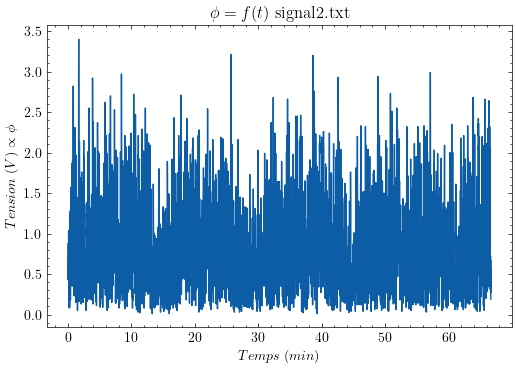

In [11]:
# Import des librairies
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# Options graphiques
plt.style.use('science') # Style du plot
figure(figsize=(6, 4), dpi=100) # Taille du plot

# Lecture des données
dataa=np.loadtxt(r"C:\Users\chene\OneDrive\Documents\M1 Physique & Applications\Traitement du signal\TPs-20210915\Fichiers_donnees\signal2.txt")
print(dataa) # Affiche les données : matrice à deux colonnes contenant t et V
print("N =",len(dataa[:,0])) # Affiche la longueur de la matrice des données (N valeurs)

# Mise en forme des données
plt.plot(dataa[:,0]/60e3, dataa[:,1]) # Trace le graphe V=f(flux) / data[:,0]=Temps, abscisse / data[:,1]=Tension, ordonnée
plt.xlabel("$Temps~(min)$" ) # Titre de l'axe x
plt.ylabel("$Tension~(V) \propto \phi$") # Titre de l'axe y
plt.title("$\phi=f(t)$ signal2.txt") # Titre du plot
plt.show() # Affichage du plot

<IPython.core.display.Latex object>

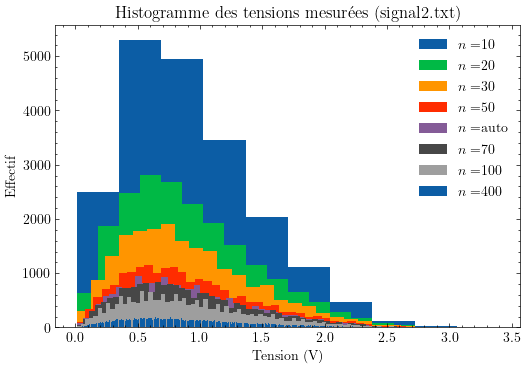

In [12]:
# Import des librairies
from IPython.display import display, Latex

# Options graphiques
plt.style.use('science') # Style du plot
figure(figsize=(6, 4), dpi=100) # Taille du plot

# Boucle for qui permet de tracer plusieurs histogrammes pour différents nombre d'intervalle (n)
n=[10,20,30,50,"auto",70,100, 400]
for i in n:
    plt.hist(dataa[:,1], i, label="$n= $"+format(i)) # Dessine l'histogramme
plt.xlabel("Tension (V)") # Titre de l'axe x
plt.ylabel("Effectif") # Titre de l'axe y
plt.title("Histogramme des tensions mesurées (signal2.txt)") # Titre de l'histogramme
plt.legend() # Affiche la légende sur l'histogramme

# Obtenir la valeur de n=auto
effectif,intervalle = np.histogram(dataa[:,1], bins='auto') 
display(Latex('$n_{auto}=~$'f'${len(effectif)}$')) # Affiche le nombre d'intervalle pour n=auto

plt.show() # Affiche la compilation des histogrammes

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

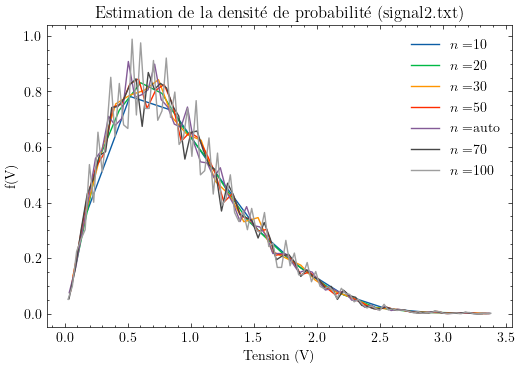

In [13]:
# Options graphiques
plt.style.use('science') # Style du plot
figure(figsize=(6, 4), dpi=100) # Taille du plot

# Boucle qui trace la densité de probabilité pour différentes valeurs de n
n=[10,20,30,50,"auto",70,100]
for nbInter in n:

    hist,bins = np.histogram(dataa[:,1], bins=nbInter) 

    # Calcule la probabilité p(X)
    f=[]
    for i in range(len(hist)):
        i=(hist[i]/((bins[i+1]-bins[i])*sum(hist)))
        f.append(i)

    # Calcule la valeur de la tension moyenne dans l'intervalle x_(i) , x_(i+1)
    V=[]
    for i in range(len(hist)):
        i=(bins[i+1]+bins[i])/2
        V.append(i)

    plt.plot(V, f, label="$n= $"+format(nbInter)) # Trace le plot
    
    # Calcul de l'intégrale de la densité de probabilité par la méthode des trapèzes
    Int=[]
    for i in range(len(V)-1):
        i=((V[i+1]-V[i])*((f[i+1]+f[i])/2))
        Int.append(i)
    display(Latex(f'$n={nbInter}:$''$\int_{x_0}^{x_{n}}f(x)dx=~$'f'${format(sum(Int),".4f")}$')) # Affiche la valeur de l'intégrale
    
plt.xlabel("Tension (V)")
plt.ylabel("f(V)")
plt.title("Estimation de la densité de probabilité (signal2.txt)")
plt.legend()
plt.show()

In [14]:
moy=np.average(dataa[:,1])

display(Latex('$\overline{V}=$'f'$~{format(moy,".4f")}~V$')) # Affiche la valeur de la moyenne expérimentale


<IPython.core.display.Latex object>

In [15]:
med=np.median(dataa[:,1])

display(Latex('$med=$'f'$~{format(med,".4f")}~V$')) # Affiche la valeur de la médiane


<IPython.core.display.Latex object>

In [16]:
# Calcul de la variance
var=np.var(dataa[:,1])
display(Latex('$var=$'f'$~{format(var,".4f")}$')) # Affiche la valeur de la variance expérimentale

# Calcul de l'écart type
std=np.std(dataa[:,1])
display(Latex('$std=$'f'$~{format(std,".4f")}$')) # Affiche la valeur de l'écart-type expérimental

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [29]:
YI=[]
for i in range(len(dataa[:,1])):
    i=(1/len(dataa[:,1]))*pow((((dataa[:,1][i])-np.average(dataa[:,1]))/np.std(dataa[:,1])),3)
    YI.append(i)
    
display(Latex('$\widehat{\gamma_1}=$'f'$~{format(sum(YI),".3f")}$')) # Affiche la valeur de l'asymétrie

YII=[]
for i in range(len(dataa[:,1])):
    i=(1/len(dataa[:,1]))*pow((((dataa[:,1][i])-np.average(dataa[:,1]))/np.std(dataa[:,1])),4)
    YII.append(i)
    
display(Latex('$\widehat{\gamma_2}=$'f'$~{format(sum(YII)-3,".3f")}$')) # Affiche la valeur de l'aplatissement

from scipy.stats import skew, kurtosis
skew=skew(dataa[:,1])
print("skew =", format(skew,".3f"))
kurt=kurtosis(dataa[:,1])
print("kurtosis =", format(kurt,".2f"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

skew = 0.783
kurtosis = 0.36


```python 
#LA REPONSE ICI
```
